In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=10e55dd08f082dcb634a0e548d9fac8cf6675f14e3a5dadeea9ba3c0132d2f81
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
pip install seaborn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.dates as mdates



project = 'personal-projects-382818' # Project ID inserted based on the query results selected to explore
location = 'EU' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Q1. How many deals are successfully won and how different by region and sales person, vertical/genre, business potential


In [ ]:
status_distribution_client = client.get_job('bquxjob_662b5e1d_187d13fb230')
status_distribution_df = status_distribution_client.to_dataframe()
status_distribution_df


,status,count,percentage
0,Lost,7810,82.00
1,Open,1075,11.29
2,Won,639,6.71


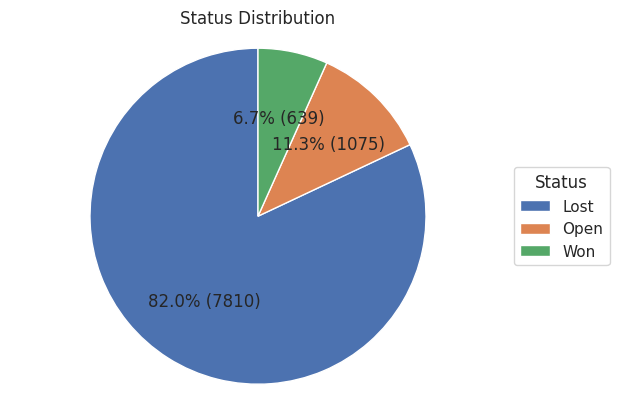

In [ ]:

sns.set(style="whitegrid")

# Create a pie chart
fig, ax = plt.subplots()

# Custom autopct function to display both percentage and count
def custom_autopct(pct):
    count = int(round(pct * sum(status_distribution_df['count']) / 100.0))
    return f"{pct:.1f}% ({count})"

# Create the pie chart without labels (set labels to None)
wedges, texts, autotexts = ax.pie(status_distribution_df['count'], labels=None, autopct=custom_autopct, startangle=90)

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')

# Customize the plot
ax.set_title('Status Distribution')

# Add a legend to the right of the pie chart with the status labels in a small box
ax.legend(wedges, status_distribution_df['status'], title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

In [ ]:
won_time_series_client = client.get_job('bquxjob_68f351fa_187d8991492')
won_time_series_df = won_time_series_client.to_dataframe()
won_time_series_df.head()

,won_time,count
0,Dec 2020,13
1,Jul 2022,5
2,Apr 2022,17
3,Jan 2022,34
4,Dec 2021,90


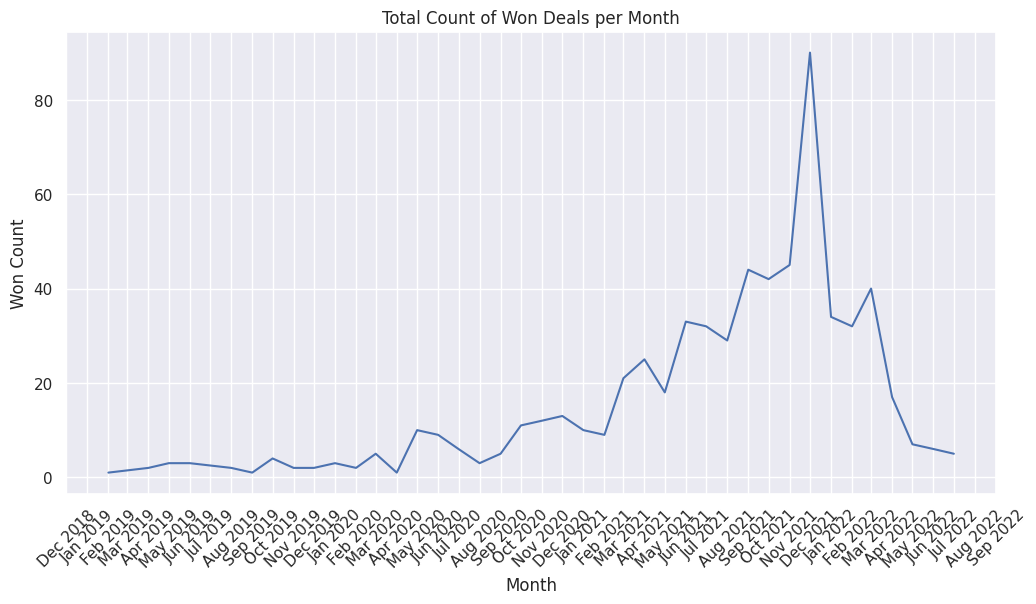

In [ ]:
won_time_series_df['won_time'] = pd.to_datetime(won_time_series_df['won_time'], format='%b %Y')
won_time_series_df = won_time_series_df.sort_values(by='won_time')

# Create the Seaborn line graph
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='won_time', y='count', data=won_time_series_df)
plt.title('Total Count of Won Deals per Month')
plt.xlabel('Month')
plt.ylabel('Won Count')

# Set the x-axis to show every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

## Q1-1. What is the distrubtion by sales-business-unit?

In [ ]:
won_country_dis_cl = client.get_job('bquxjob_385e66db_187d1434260')
won_country_dis_df = won_country_dis_cl.to_dataframe()
won_country_dis_df


,sales_business_unit,count,percentage,country_code
0,USA,406,63.54%,USA
1,France,87,13.62%,FRA
2,Brazil,36,5.63%,BRA
3,India,30,4.69%,IND
4,UK,27,4.23%,GBR
5,Spanish Latam,19,2.97%,LAM
6,ANZ,16,2.5%,OCN
7,South Korea,11,1.72%,KOR
8,Spain,7,1.1%,ESP


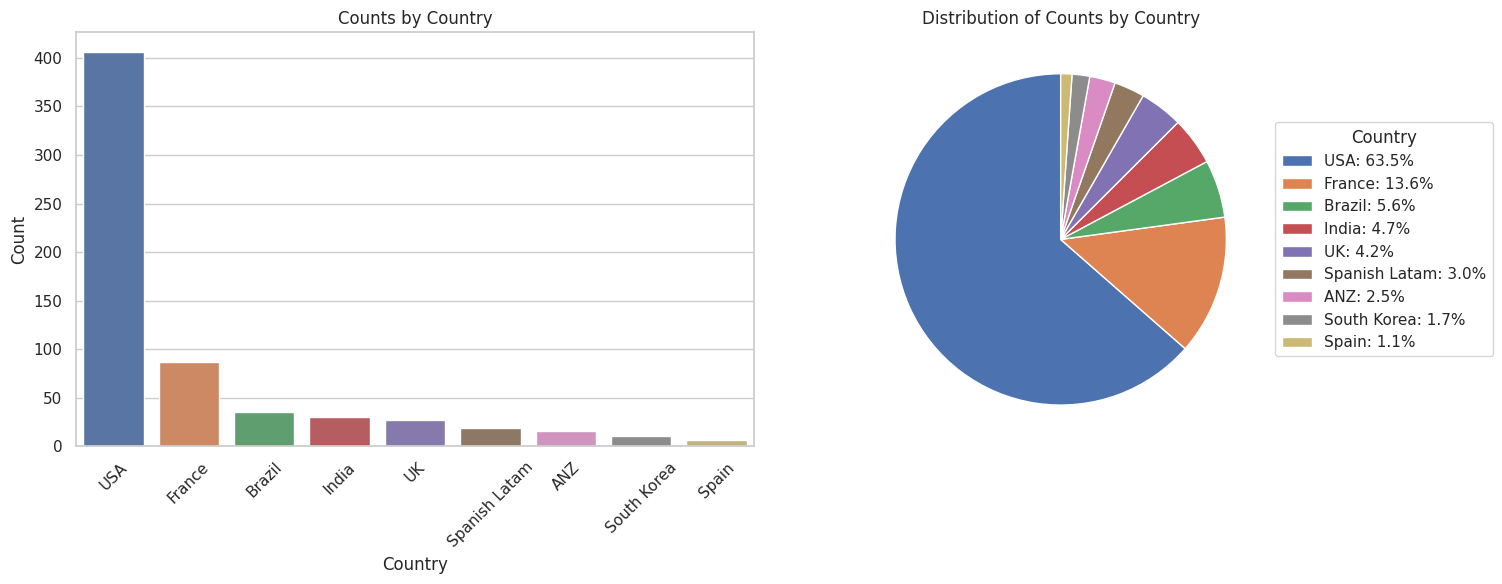

In [ ]:

# Create a 1x2 grid of plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar graph
sns.barplot(x="sales_business_unit", y="count", data=won_country_dis_df, ax=axes[0])
axes[0].set_title("Counts by Country")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)  # Rotate x-axis labels

# Pie chart
sales_business_units = won_country_dis_df['sales_business_unit'].tolist()
counts = won_country_dis_df['count'].tolist()
total_counts = sum(counts)
percentages = [100 * count / total_counts for count in counts]
labels = [f"{sbu}: {percentage:.1f}%" for sbu, percentage in zip(sales_business_units, percentages)]

wedges, _ = axes[1].pie(counts, startangle=90, textprops={'fontsize': 10})
axes[1].set_title("Distribution of Counts by Country")
axes[1].set_ylabel("")  # Hide the y-axis label
axes[1].legend(wedges, labels, title="Country", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
country_status_dis_cl = client.get_job('bquxjob_5fce3e9d_187d1500ee9')
country_status_dis_df = country_status_dis_cl.to_dataframe()
country_status_dis_df


,sales_business_unit,status,count,won_percentage
0,ANZ,Lost,371,75.1%
1,ANZ,Open,107,21.66%
2,ANZ,Won,16,3.24%
3,Brazil,Lost,834,89.01%
4,Brazil,Open,67,7.15%
5,Brazil,Won,36,3.84%
6,France,Lost,713,82.62%
7,France,Open,63,7.3%
8,France,Won,87,10.08%
9,India,Lost,854,96.5%


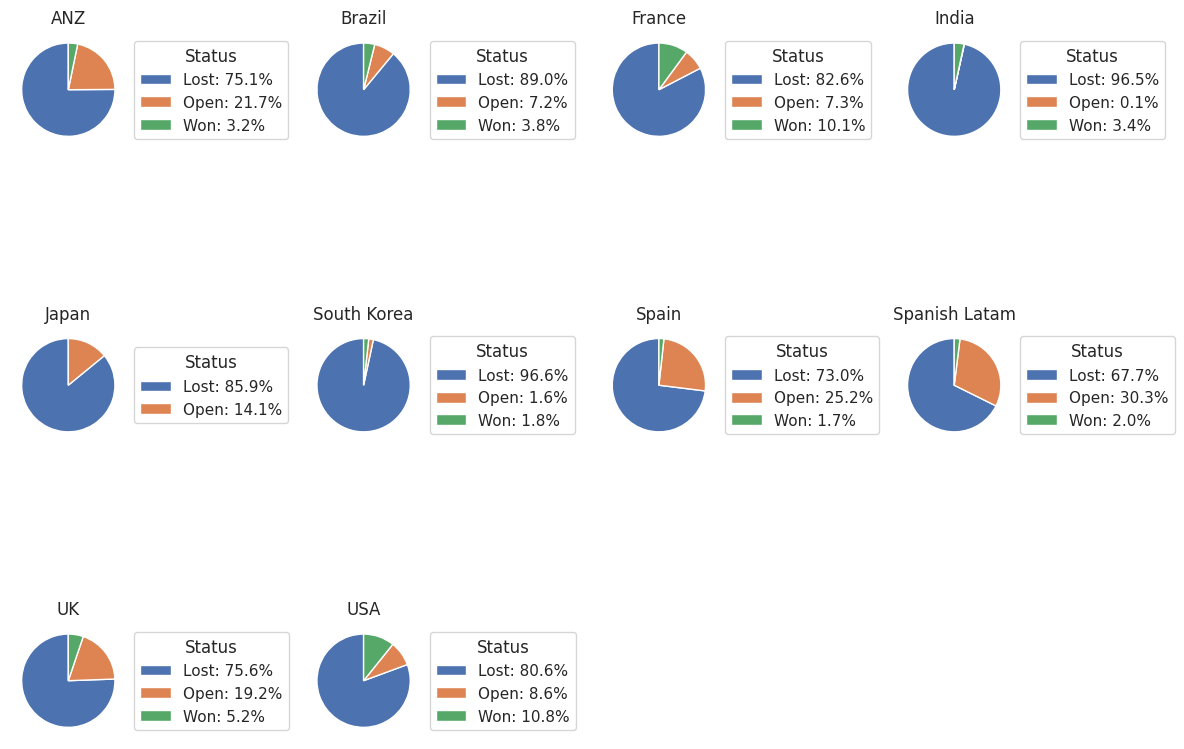

In [ ]:

# Get the unique countries
countries = country_status_dis_df['sales_business_unit'].unique()

# Calculate the number of pie charts
num_charts = len(countries)

# Create the subplots grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, country in enumerate(countries):
    # Calculate the row and column position in the 4x4 grid
    row, col = divmod(i, 4)
    # Filter data for the current country
    country_data = country_status_dis_df[country_status_dis_df['sales_business_unit'] == country]

    # Calculate percentages
    total_counts = country_data['count'].sum()
    percentages = [100 * count / total_counts for count in country_data['count']]

    # Generate labels for the pie chart
    labels = [f"{status}: {percentage:.1f}%" for status, percentage in zip(country_data['status'], percentages)]

    # Create the pie chart
    wedges, _ = axes[row, col].pie(country_data['count'], startangle=90, textprops={'fontsize': 10})
    axes[row, col].set_title(f"{country}")
    axes[row, col].legend(wedges, labels, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Remove empty plots
for i in range(num_charts, 16):
    row, col = divmod(i, 4)
    fig.delaxes(axes[row, col])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## Q1-2. Which month is the best sales month

The best sales month is in DEC 2021, the won deal is 90 deals in total. Nov 2021, Sep 2021, Oct 2021 follows.

In [ ]:
motnh_sales_client = client.get_job('bquxjob_501235b2_187d15ebcd6')
month_sales_df = motnh_sales_client.to_dataframe()
month_sales_df.head()

,month_year,count,total_est_revenue
0,Dec 2021,90,22920000
1,Nov 2021,45,12360000
2,Sep 2021,44,11940000
3,Oct 2021,42,11280000
4,Mar 2022,40,11700000


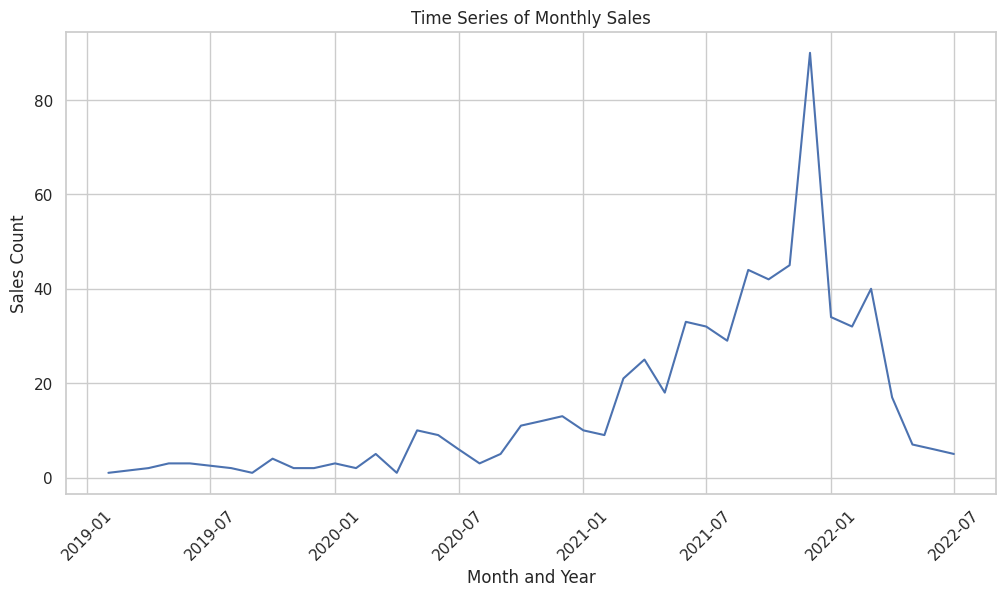

In [ ]:
# Convert 'month_year' column to datetime format
month_sales_df['month_year'] = pd.to_datetime(month_sales_df['month_year'], format='%b %Y')

# Sort the DataFrame by 'month_year' in ascending order
month_sales_df = month_sales_df.sort_values(by='month_year')

# Create the time series plot using Seaborn's lineplot function
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_sales_df, x='month_year', y='count')

# Customize plot (optional)
plt.title('Time Series of Monthly Sales')
plt.xlabel('Month and Year')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Q1-3. Who is the best sales person in each month?

In [ ]:
sales_person_client = client.get_job('bquxjob_22250ed0_187d28e1021')
sales_person_df = sales_person_client.to_dataframe()
sales_person_df.head()

,month_year,sales_owner,count
0,Sep 2021,SB,5
1,Sep 2021,RB,5
2,Sep 2021,MV,1
3,Sep 2021,CR,4
4,Sep 2021,HW,9


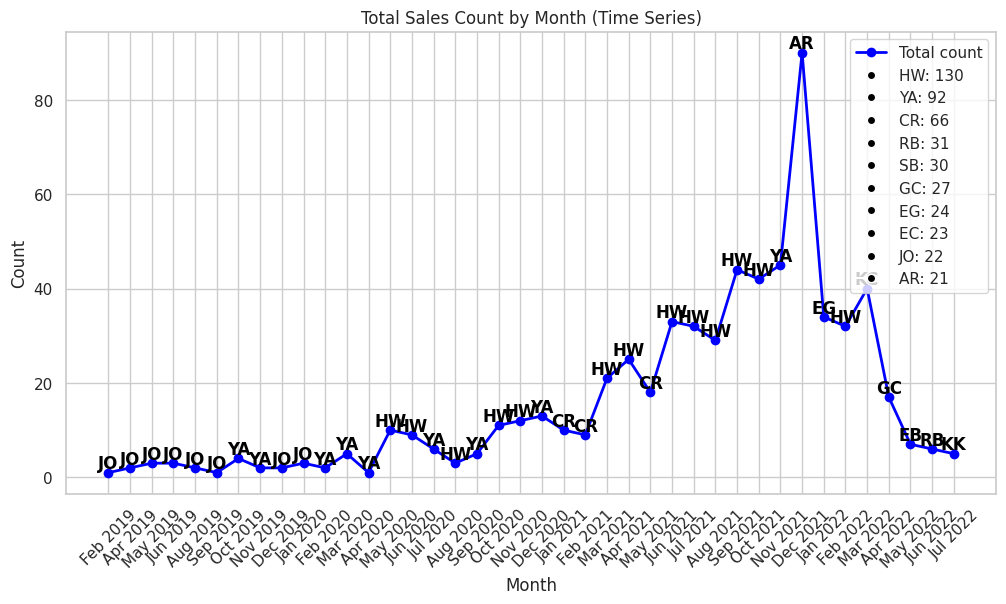

In [ ]:
sales_person_df = sales_person_df.dropna()

# Convert 'month_year' to datetime format and sort by 'month_year'
sales_person_df['month_year'] = pd.to_datetime(sales_person_df['month_year'])
sales_person_df = sales_person_df.sort_values(by='month_year')

# Pivot the DataFrame to have 'month_year' as index and 'sales_owner' as columns
pivot_df = sales_person_df.pivot_table(index='month_year', columns='sales_owner', values='count', fill_value=0)

# Find the sales_owner with the highest count for each month
top_sales_owner = pivot_df.idxmax(axis=1)

# Calculate total count for each sales_owner and find the top 10 sales_owners
total_count = sales_person_df.groupby('sales_owner')['count'].sum().sort_values(ascending=False)
top_10_sales_owners = total_count.head(10)

# Create a time series line graph using Matplotlib
x = np.arange(len(pivot_df.index))

fig, ax = plt.subplots(figsize=(12, 6))

# Add time series line graph
ax.plot(x, pivot_df.sum(axis=1), color='blue', marker='o', linewidth=2)

# Annotate the top sales_owner for each month
for i, (month, sales_owner) in enumerate(top_sales_owner.items()):
    count = pivot_df.loc[month].sum()
    ax.annotate(sales_owner,
                xy=(i, count),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                color='black')

# Customize labels and titles
ax.set_title("Total Sales Count by Month (Time Series)")
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index.strftime('%b %Y'), rotation=45)  # Format and rotate x-axis labels

# Create a custom legend with top 10 sales_owners and their total counts
legend_elements = [plt.Line2D([0], [0], color='blue', marker='o', linewidth=2, label='Total count')]
legend_elements += [plt.Line2D([0], [0], color='w', marker='o', markerfacecolor='black', label=f'{owner}: {count}') for owner, count in top_10_sales_owners.items()]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()

## Q1-4, Wht is the days of won time?

In [ ]:
won_days_client = client.get_job('bquxjob_34d6ea8b_187d2a92f03')
won_days_df = won_days_client.to_dataframe()
won_days_df.head()

,won_days
0,293
1,546
2,476
3,56
4,433


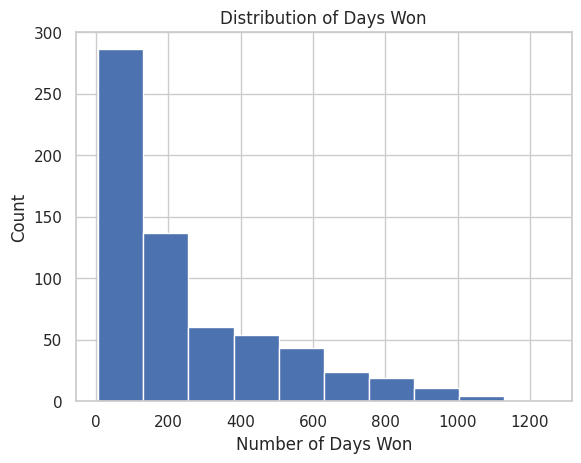

In [ ]:
# Draw a histogram of the 'won_days' column
won_days_df['won_days'].hist()

# Add labels and title
plt.xlabel("Number of Days Won")
plt.ylabel("Count")
plt.title("Distribution of Days Won")

# Show the plot
plt.show()

The following query shows the max, min, avg days of won since the deal created by each countries.

In [ ]:
won_days_con_client = client.get_job('bquxjob_6a728faa_187b9d65af3')
won_days_con_df = won_days_con_client.to_dataframe()
won_days_con_df.head()

## Q1-5. What genre/vertical among all deals and their avg/sum-est-rev?

In [ ]:
genre_rev_client = client.get_job('bquxjob_18a8948_187b9db82fd')
genre_rev_df = genre_rev_client.to_dataframe()
genre_rev_df.head()

## Q1-6. The distribution of business potential

In [ ]:
bp_client = client.get_job('bquxjob_21f98353_187b9de2ae2')
bp_df = bp_client.to_dataframe()
bp_df.head()

Business potential by genre

In [ ]:
bp_genre_client = client.get_job('bquxjob_1360bac2_187b9df9ccd')
bp_genre_df = bp_genre_client.to_dataframe()
bp_genre_df.head()

# Q2. Stages, funnel analysis for each stages

The stages order: 1. Outreaching > 2. Discussing > 3. Testing > 4. Preparing Offer > 5.Negotiating > 6.Redlining

1) what is the % to get each stages from outreaching?

Followings are the method to obtain the % to be positively moved from one stage to another
Outreaching > Discussing (%). : (Discussing + Testing + Preparing Offer + Negotiating + Redlining)/(Total Deal counts) * 100
Discussing > Testing: (%) ; (Testing + Preparing Offer + Negotiating + Redlining)/(Discussing + Testing + Preparing Offer + Negotiating + Redlining) * 100
Testing > Preparing Offer (%) : (Preparing Offer + Negotiating + Redlining)/(Testing + Preparing Offer + Negotiating + Redlining) * 100
Preparing offer > Negotiating (%) : (Negotiating + Redlining)/(Preparing Offer + Negotiating + Redlining) * 100
Negotiating > Redlining (%) : (Redlining)/(Negotiating + Redlining) * 100

Let's first check how many deal counts currently exist in each stages.

 how different by country?

In [ ]:
sales_funnel_client = client.get_job('bquxjob_26ad68fc_187d2b7fce4')
sales_funnel_df = sales_funnel_client.to_dataframe()
sales_funnel_df

,out_dis,dis_test,test_offer,offer_nego,nego_red
0,44.69,67.41,38.93,87.82,77.88


<ipython-input-62-18dc1f42aace>:6: RuntimeWarning:

invalid value encountered in sqrt

<ipython-input-62-18dc1f42aace>:7: RuntimeWarning:

invalid value encountered in sqrt



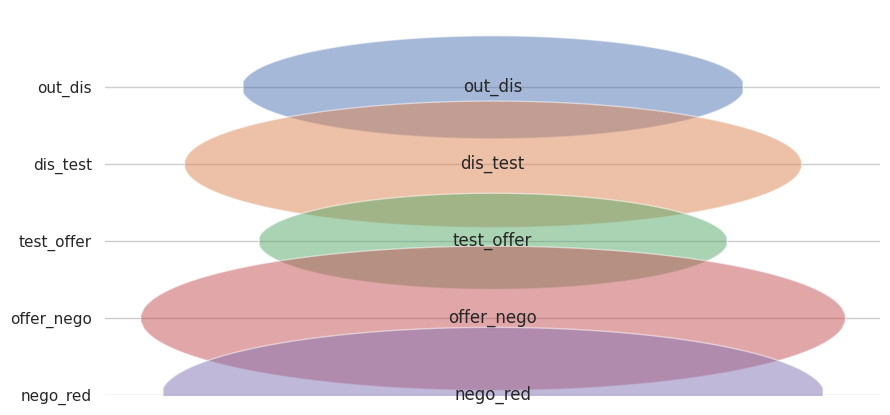

In [ ]:
def draw_funnel_chart(data, labels):
    fig, ax = plt.subplots(figsize=(10, 5))

    for i, value in enumerate(data):
        x = np.linspace(value / 2, -value / 2, 1000)
        y1 = -(i * 10) + np.sqrt(value - x ** 2)
        y2 = -(i * 10) - np.sqrt(value - x ** 2)
        ax.fill_between(x, y1, y2, alpha=0.5)
        ax.annotate(labels[i], (0, -(i * 10)), fontsize=12, ha='center', va='center')

    ax.set_ylim(-(len(data) - 1) * 10, 10)
    ax.set_yticks(-np.arange(len(data)) * 10)
    ax.set_yticklabels(labels)
    ax.set_xticks([])
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

    plt.show()

data = [44.69, 67.41, 38.93, 87.82, 77.88]
labels = ['out_dis', 'dis_test', 'test_offer', 'offer_nego', 'nego_red']
draw_funnel_chart(data, labels)

# Q3. How many emails exhanged with creators while in touch.

What is the implication of the question? > the number of total email exchanged could be one of the indicators to see how the client interest in our product + how the sales team engage with the client.

I noticed that 'total_email_messages_conunt' is 0 despite it's been contacted, this should be data missing by accident or contacted by phone etc, so those rows will be excluded from the analysis to answer the question


How often the emails exchanged with Won deals? > Acording to the histogram graphs, most concentrated range is 30~35.

Impliying that 30~35 emailes should be enough number of exchange to succeccfully onboard creators. > At the same time, we might throw a question that "Any more efficient way to minimize the number of email exchange (i.e. minimizing contact leading to the faster on-boarding process)"

Case 1: total_email_messages_count > 0 - The most concentrated range 0~50

Case 2: total_email_messages_count < 50 - The most concentrated area: 30~35


In [ ]:
email_case1_client = client.get_job('bquxjob_eeedcd5_187dc7560ec')
email_case1_df = email_case1_client.to_dataframe()

# email_case2_client = client.get_job('bquxjob_5306354d_187d2c1894f')
# email_case2_df = email_case2_client.to_dataframe()

In [ ]:
email_case1_df.head()

,total_email_messages_count
0,104
1,86
2,35
3,78
4,25


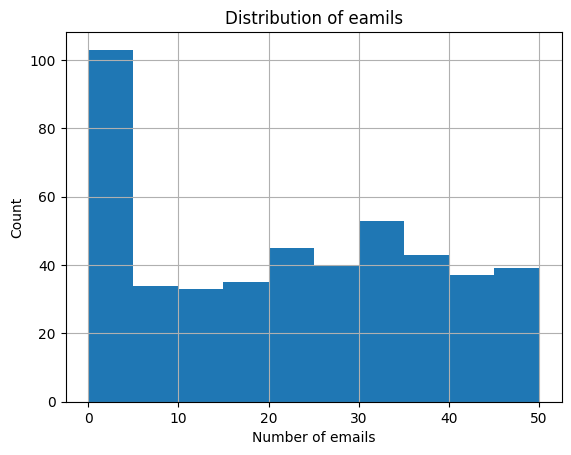

In [ ]:
# Draw a histogram of the 'value' column
email_case1_df['total_email_messages_count'].hist()

# Add labels and title
plt.xlabel("Number of emails")
plt.ylabel("Count")
plt.title("Distribution of eamils")


# Show the plot
plt.show()

In [ ]:
email_case2_df.head()

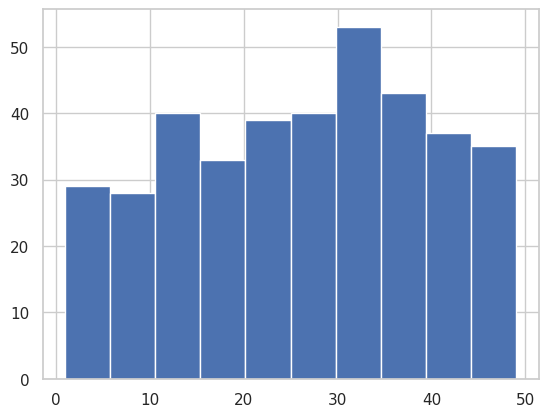

In [ ]:
# Draw a histogram of the 'value' column
email_case2_df['total_email_messages_count'].hist()

# Show the plot
plt.show()